In [1]:
# dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import orchest
import pickle

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from prefect import flow, task

In [ ]:
# get data from data preprocessing
data = orchest.get_inputs()
df, X, y = data['preprocessed-df']

In [110]:
df = pd.read_csv('C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 11 - Car Price Prediction\\dataset\\preprocessed_dataset.csv')

In [111]:
df.head()

,Unnamed: 0,name,company,year,Price,fuel_type,Mileage
0,0,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,398132.709877,Petrol,22000.0
1,1,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,325000.000000,Petrol,28000.0
2,2,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,575000.000000,Diesel,36000.0
3,3,Ford EcoSport Titanium 1.5L TDCi,Ford,2015.0,398132.709877,Diesel,59000.0
4,4,Mahindra Scorpio SLE BS IV,Mahindra,2015.0,320000.000000,Diesel,48660.0


In [112]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [113]:

def feature_engineering(df):
    # the code says, for each unique value in column race, find the unique value and associate it with the unique key between(0, 1, 2,...)
    # and place that in label encoder race as a dictionary
    label_encoding_name = {value: key for key, value in enumerate(df['name'].unique())}
    df['name'] = df['name'].map(label_encoding_name)

    label_encoding_company = {value: key for key, value in enumerate(df['company'].unique())}
    df['company'] = df['company'].map(label_encoding_company)    
    return df

df = feature_engineering(df)

In [114]:

def seperate_dataset(df_copy):
    X = df_copy.drop('Price',axis =1)
    y = df_copy['Price']
    return X,y
original_X, y = seperate_dataset(df)

In [115]:
copy_X = original_X.copy()

In [116]:
copy_X.columns

Index(['name', 'company', 'year', 'fuel_type', 'Mileage'], dtype='object')

In [117]:
original_X.iloc[:, :].values

array([[0, 0, 2018.0, 'Petrol', 22000.0],
       [1, 1, 2014.0, 'Petrol', 28000.0],
       [2, 2, 2014.0, 'Diesel', 36000.0],
       ...,
       [146, 5, 2009.0, 'Petrol', 109500.0],
       [428, 12, 2018.0, 'Diesel', 27000.0],
       [429, 3, 2013.0, 'Diesel', 40000.0]], dtype=object)

In [130]:
original_X

,name,company,year,fuel_type,Mileage
0,0,0,2018.0,Petrol,22000.0
1,1,1,2014.0,Petrol,28000.0
2,2,2,2014.0,Diesel,36000.0
3,2,2,2015.0,Diesel,59000.0
4,3,3,2015.0,Diesel,48660.0
...,...,...,...,...,...
664,426,0,2011.0,Petrol,50000.0
665,427,12,2009.0,Diesel,30000.0
666,146,5,2009.0,Petrol,109500.0
667,428,12,2018.0,Diesel,27000.0


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
original_X['fuel_type'] = le.fit_transform(original_X['fuel_type'])

In [132]:
original_X

,name,company,year,fuel_type,Mileage
0,0,0,2018.0,2,22000.0
1,1,1,2014.0,2,28000.0
2,2,2,2014.0,0,36000.0
3,2,2,2015.0,0,59000.0
4,3,3,2015.0,0,48660.0
...,...,...,...,...,...
664,426,0,2011.0,2,50000.0
665,427,12,2009.0,0,30000.0
666,146,5,2009.0,2,109500.0
667,428,12,2018.0,0,27000.0


In [133]:

def feature_importance(X,y):
    # Important feature using ExtraTreesRegressor
    selection = ExtraTreesRegressor()
    selection.fit(X, y)
    return selection
selection = feature_importance(original_X, y)

In [134]:
#selection = feature_importance(df)
print(selection.feature_importances_)

[0.23286539 0.30841694 0.24061337 0.04531691 0.17278739]


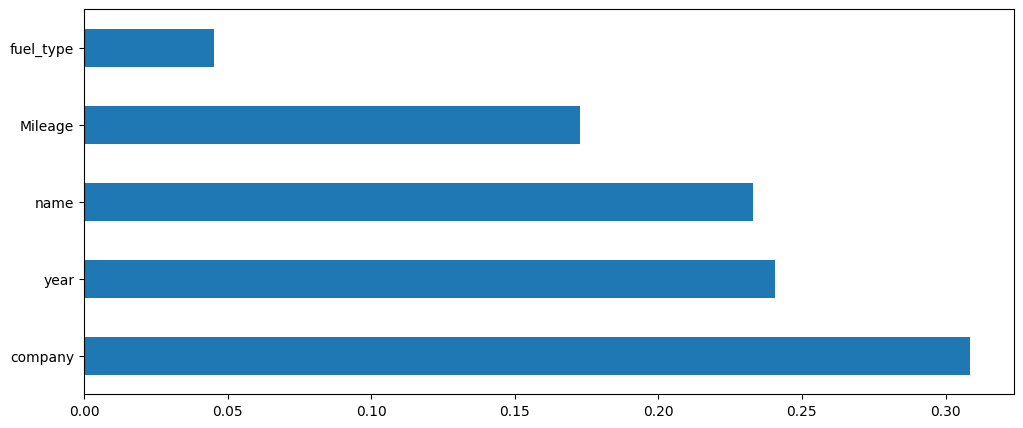

In [135]:
plt.figure(figsize=(12, 5))
feature_imp = pd.Series(selection.feature_importances_, index=copy_X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [136]:
original_X

,name,company,year,fuel_type,Mileage
0,0,0,2018.0,2,22000.0
1,1,1,2014.0,2,28000.0
2,2,2,2014.0,0,36000.0
3,2,2,2015.0,0,59000.0
4,3,3,2015.0,0,48660.0
...,...,...,...,...,...
664,426,0,2011.0,2,50000.0
665,427,12,2009.0,0,30000.0
666,146,5,2009.0,2,109500.0
667,428,12,2018.0,0,27000.0


In [138]:
# removing correlated variables from dataframe using DropCorrelatedFeatures
from feature_engine.selection import DropCorrelatedFeatures
original_X.columns
original_X[['name','company','year','fuel_type','Mileage']].corr()


,name,company,year,fuel_type,Mileage
name,1.000000,0.169286,-0.086665,-0.049205,0.117173
company,0.169286,1.000000,0.090315,-0.234083,0.078334
year,-0.086665,0.090315,1.000000,-0.164019,-0.323225
fuel_type,-0.049205,-0.234083,-0.164019,1.000000,-0.332449
Mileage,0.117173,0.078334,-0.323225,-0.332449,1.000000


In [139]:
# removing correlated features
df_X = pd.DataFrame(original_X)
df_X.head()

,name,company,year,fuel_type,Mileage
0,0,0,2018.0,2,22000.0
1,1,1,2014.0,2,28000.0
2,2,2,2014.0,0,36000.0
3,2,2,2015.0,0,59000.0
4,3,3,2015.0,0,48660.0


In [140]:
cor_matrix = df_X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(upper_tri)

           name   company      year  fuel_type   Mileage
name        NaN  0.169286  0.086665   0.049205  0.117173
company     NaN       NaN  0.090315   0.234083  0.078334
year        NaN       NaN       NaN   0.164019  0.323225
fuel_type   NaN       NaN       NaN        NaN  0.332449
Mileage     NaN       NaN       NaN        NaN       NaN


C:\Users\Cash Crusaders\AppData\Local\Temp\ipykernel_3088\104842216.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


In [142]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print()
print(to_drop)


[]


In [143]:
# drop the two columns
def drop_correlated(df, to_drop):
    for col in df.columns:
        for i in to_drop:
            if col == i:
                df.drop(col,axis=1,inplace = True)
    df_final = df.copy()
    return df_final
df_X_final = drop_correlated(df_X, to_drop)

In [144]:
#df_X_1 = df_X.drop(df_X.columns[to_drop], axis =1)
print()
print(df_X_final.head())


   name  company    year  fuel_type  Mileage
0     0        0  2018.0          2  22000.0
1     1        1  2014.0          2  28000.0
2     2        2  2014.0          0  36000.0
3     2        2  2015.0          0  59000.0
4     3        3  2015.0          0  48660.0


In [145]:

df_X_final.columns
X = pd.DataFrame(df_X_final)

In [146]:
X 

,name,company,year,fuel_type,Mileage
0,0,0,2018.0,2,22000.0
1,1,1,2014.0,2,28000.0
2,2,2,2014.0,0,36000.0
3,2,2,2015.0,0,59000.0
4,3,3,2015.0,0,48660.0
...,...,...,...,...,...
664,426,0,2011.0,2,50000.0
665,427,12,2009.0,0,30000.0
666,146,5,2009.0,2,109500.0
667,428,12,2018.0,0,27000.0


In [147]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [148]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((535, 5), (134, 5), (535,), (134,))

In [154]:
from sklearn.decomposition import PCA
def principal_component_analysis(X_train, X_test):

    pca = PCA(n_components = 4)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    # number of components
    n_pcs= pca.components_.shape[0]
    #n_pcs

    # get the index of the most important feature on EACH component i.e. largest absolute value
    # using LIST COMPREHENSION HERE
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    #most_important

    initial_feature_names = ['name','company','year','fuel_type','Mileage']

    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # using LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df = pd.DataFrame(sorted(dic.items()))
    #df

    # get all the selected features from the dataframe
    X_new = df.iloc[:, -1].values

    list(X_new)

    # get selected features of the PCA
    selected_x = X.loc[:, list(X_new)]
    return df, selected_x, most_important_names

In [155]:
df, selected_x, most_important_names = principal_component_analysis(X_train, X_test)

In [156]:
df

,0,1
0,PC1,Mileage
1,PC2,name
2,PC3,company
3,PC4,year


In [157]:
selected_x

,Mileage,name,company,year
0,22000.0,0,0,2018.0
1,28000.0,1,1,2014.0
2,36000.0,2,2,2014.0
3,59000.0,2,2,2015.0
4,48660.0,3,3,2015.0
...,...,...,...,...
664,50000.0,426,0,2011.0
665,30000.0,427,12,2009.0
666,109500.0,146,5,2009.0
667,27000.0,428,12,2018.0


In [158]:
most_important_names

['Mileage', 'name', 'company', 'year']

In [162]:
chosen_X = X[['Mileage', 'name', 'company', 'year']]

In [163]:
chosen_X

,Mileage,name,company,year
0,22000.0,0,0,2018.0
1,28000.0,1,1,2014.0
2,36000.0,2,2,2014.0
3,59000.0,2,2,2015.0
4,48660.0,3,3,2015.0
...,...,...,...,...
664,50000.0,426,0,2011.0
665,30000.0,427,12,2009.0
666,109500.0,146,5,2009.0
667,27000.0,428,12,2018.0


In [164]:
X_train, X_test, y_train, y_test = train_test_split(chosen_X, y, test_size = 0.2, random_state = 1)

In [165]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((535, 4), (134, 4), (535,), (134,))

In [2]:

# normalization
# Scaling 
# standardization
sc = StandardScaler()

In [168]:

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
import pickle
file = open('C:\\Users\\Cash Crusaders\\Desktop\\My Portfolio\\Projects\\Data Science Projects\\Machine Learning Project 11 - Car Price Prediction\\dataset\\standard_scaler.pkl', 'wb')
pickle.dump(sc,file)